## Training Plotter
This file creates plots for the training error rates of the Neural Network and CatBoost Regressor

In [1]:
import regex
import json
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


DATA_PATH = Path("src", "filter", "model_evals")
TYPES = ["neural", "catreg"]
MODELS = ["critics_model", "audience_model", "divergence_model"]
CATEGORIES = ["train", "test"]


In [2]:
# store all MAE errors in this dict
data_storage: dict[str, dict[str, dict[str, list[float]]]] = {
    _type: {
            _model: {
                _cat: None for _cat in CATEGORIES
            } 
            for _model in MODELS
        } 
    for _type in TYPES
}

pattern = regex.compile(f"^({'|'.join(MODELS)})_({'|'.join(TYPES)})_({'|'.join(CATEGORIES)}).list$")

for data_path in DATA_PATH.iterdir():
    if pattern.match(data_path.name) != None:
        _model, _type, _cat = pattern.findall(data_path.name)[0]
        with open(data_path) as file:
            data_storage[_type][_model][_cat] = np.array(json.load(file))

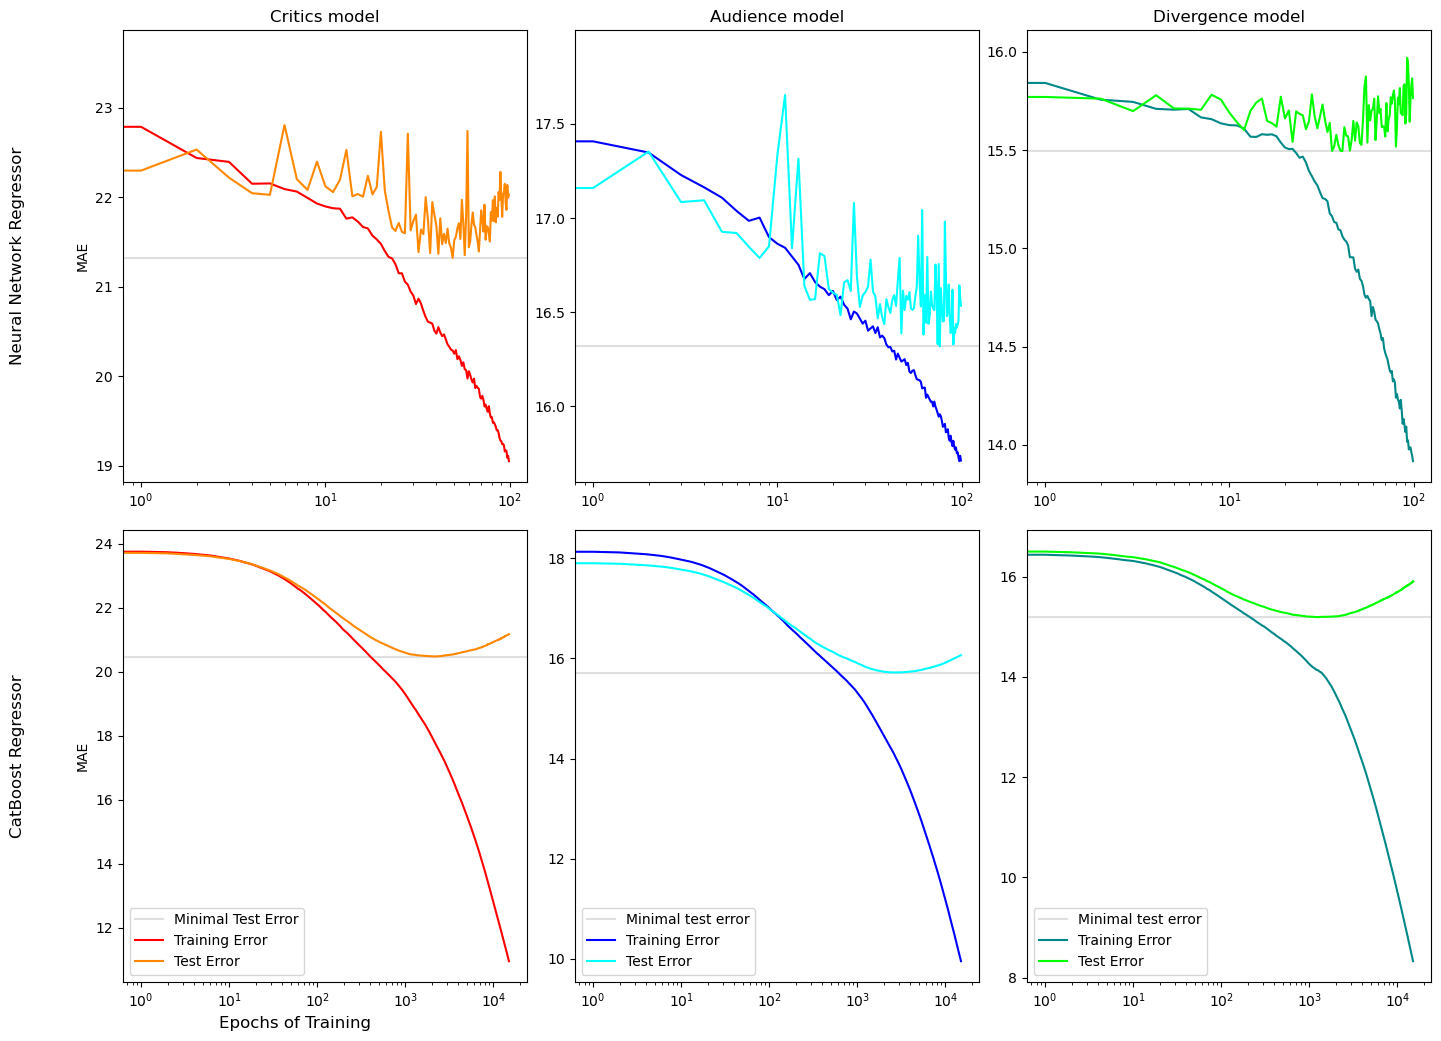

In [3]:
layout_dict = {
    "pad": 3.5, 
    "w_pad": -1.5, 
    "h_pad": -1, 
    "rect": (0, 0, 1, 1),
}
subplot_kw = {
    "xscale": "log",
}
fig = plt.figure(figsize=(15, 10), tight_layout=layout_dict)

upper_fig, lower_fig = fig.subfigures(2, 1)
upper_fig.supylabel("Neural Network Regressor")
lower_fig.supylabel("CatBoost Regressor")

# Neural Regression
upper = upper_fig.subplots(1, 3, subplot_kw=subplot_kw)
# upper[0].xscale("log")

# draw lower bound of test mae
minimum = np.min(data_storage["neural"]["critics_model"]["test"])
upper[0].axline((0, minimum), (1, minimum), color="grey", alpha=0.25, label="Minimal Test Error")
upper[0].set_title("Critics Model")
upper[0].set_ylabel("MAE")
upper[0].plot(data_storage["neural"]["critics_model"]["train"], color="#ff0000")
upper[0].plot(data_storage["neural"]["critics_model"]["test"], color="#ff8800")

minimum = np.min(data_storage["neural"]["audience_model"]["test"])
upper[1].axline((0, minimum), (1, minimum), color="grey", alpha=0.25, label="Minimal Test Error")
upper[1].set_title("Audience Model")
upper[1].plot(data_storage["neural"]["audience_model"]["train"], color="#0000ff")
upper[1].plot(data_storage["neural"]["audience_model"]["test"], color="#00ffff")

minimum = np.min(data_storage["neural"]["divergence_model"]["test"])
upper[2].axline((0, minimum), (1, minimum), color="grey", alpha=0.25, label="Minimal Test Error")
upper[2].set_title("Divergence Model")
upper[2].plot(data_storage["neural"]["divergence_model"]["train"], color="#008888")
upper[2].plot(data_storage["neural"]["divergence_model"]["test"], color="#00ff00")

# CatBoost Regression
lower_fig.supxlabel("Epochs of Training", x=0.21, y=-0.05)
lower = lower_fig.subplots(1, 3, subplot_kw=subplot_kw)

minimum = np.min(data_storage["catreg"]["critics_model"]["test"])
lower[0].axline((0, minimum), (1, minimum), color="grey", alpha=0.25, label="Minimal Test Error")
lower[0].set_ylabel("MAE")
lower[0].plot(data_storage["catreg"]["critics_model"]["train"], color="#ff0000", label="Training Error")
lower[0].plot(data_storage["catreg"]["critics_model"]["test"], color="#ff8800", label="Test Error")

minimum = np.min(data_storage["catreg"]["audience_model"]["test"])
lower[1].axline((0, minimum), (1, minimum), color="grey", alpha=0.25, label="Minimal Test Error")
lower[1].plot(data_storage["catreg"]["audience_model"]["train"], color="#0000ff", label="Training Error")
lower[1].plot(data_storage["catreg"]["audience_model"]["test"], color="#00ffff", label="Test Error")

minimum = np.min(data_storage["catreg"]["divergence_model"]["test"])
lower[2].axline((0, minimum), (1, minimum), color="grey", alpha=0.25, label="Minimal Test Error")
lower[2].plot(data_storage["catreg"]["divergence_model"]["train"], color="#008888", label="Training Error")
lower[2].plot(data_storage["catreg"]["divergence_model"]["test"], color="#00ff00", label="Test Error")

# legends
lower[0].legend(loc="lower left")
lower[1].legend(loc="lower left")
lower[2].legend(loc="lower left")